# Simulation and Monte Carlo Methods

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
import random as rd

## Exercice RANDU

The LCG (linear congruential generator) RANDU is defined by the following
recurence (over the range of integers 1, . . . , 2
31 − 1):
xi = 65539xi−1 mod 231
and ui = xi/2
31 ∈ (0, 1). As we have discussed during the course, RANDU is a
notoriously bad generator.
1. Show that (ui
, ui−1, ui−2) always takes values on the union of 15 hyperplanes. (Note: 65539 = 216 + 3).
2. Implement RANDU, generate 2 × 104 points, and do a scatter plot of ui as
a function of ui−1, for the subset of i such that 0.5 ≤ ui−1 ≤ 0.51. Discuss.
3. Do a 3D plot of the triples (ui
, ui−1, ui−2) to illustrate the phenomenon
discussed in Question 1.
4. Another defect of RANDU is the poor behaviour of the least significant
bits. Illustrate this phenomenon.
5. Promise you will never use RANDU to your “chargé(e) de TD”.
6. If time permits, you can try to see if the default generator in your favorite
language behaves better than RANDU (according to the points above, but
you can also think of other ways to test a pseudo-random generator).

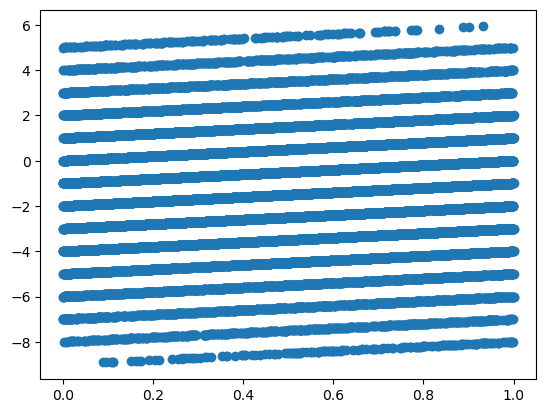

In [2]:
# 2) Implementation of RANDU algorithm
def randu(N, seed=42):
    m = 2**31
    x = np.zeros(N)
    x[0] = seed 
    for i in range(1,N):
        x[i] = (65539*x[i-1])%m
    return x
# Working code but slow because of the hard computation, it's better to use the question 1) to compute RANDU

def randu2(N, seed=42):
    m = 2**31
    x = np.zeros(N)
    x[0] = seed
    x[1] = (65539*x[0])%m
    for i in range(2,N):
        x[i] = (6*x[i-1]-9*x[i-2])%m
    return x
# Better version of RANDU algorithm

N = 20000
u = randu2(N)/(2**31)
v = u[1:-1]  #ui-1
w = u[: -2]  #ui-2
u = u[2: ]   #ui
plt.scatter(u, 6*v-9*w)

## Exercice Geometric Distribution

Propose various algorithms to sample from a geometric distribution. Implement
them and discuss which one is best.

In [36]:
# Inversion Method
def geomInv(p):
    X = np.ceil(np.log(1-np.random.rand())/np.log(1-p))
    return X

#Rejection Method
def geomRej(p):
    X = 0
    while np.random.rand()<1-p:
        X +=1
    return X+1


(array([7.491e+03, 1.859e+03, 3.440e+02, 2.330e+02, 3.700e+01, 2.600e+01,
        5.000e+00, 1.000e+00, 3.000e+00, 1.000e+00]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

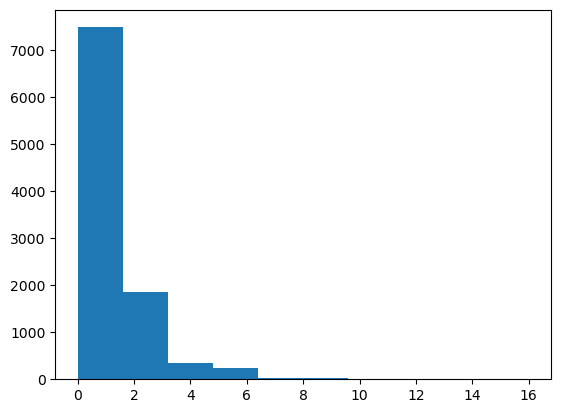

In [35]:
# Test Function
def TestGeom(N,p,f):
    arr = np.zeros(N)
    for i in range(N):
        arr[i] = f(p)
    return plt.hist(arr)

TestGeom(10000, 1/2, geomRej)

## Laplace and Rejection

1. Derive and implement a random generator for the Laplace distribution:
p(x) = 1
2
exp(−|x|)
1
2. Propose a rejection sampler for the N(0, 1) distribution, using the Laplace
distribution as the proposal. Implement it and test it.
3. Give the acceptance rate of the algorithm. Find a way to make the
acceptance condition simpler to evaluate.
4. Is it possible to do the opposite? (i.e. to sample from the Laplace distribution, using a rejection sampler based on the normal distribution.)


## MCMC

2. Derive the conditional distributions of each component, and implement
the corresponding Gibbs sampler. Represent in the plane the contours of
the density target, and the evolution of the simulated Markov chain. What
happens when ρ → 1?


In [35]:
def sample_conditional(x2,p,s):
    return np.random.normal(p*x2, s)

def Gibbs_step(x2,p,s):
    x1 = sample_conditional(x2,p,s)
    x2 = sample_conditional(x1,p,s)
    return x1,x2

def Gibbs_sampling(p, N, X0 = (0,0)):
    s = np.sqrt(1-p**2)
    X = np.zeros((N,2), dtype="float")
    X[0,0], X[0,1] = X0
    for i in range(1,N):
        X[i,0],X[i,1] = Gibbs_step(X[i-1,1], p, s)
    return X
    

In [36]:
p = 0.5

x = np.linspace(-3,3,50)
y = np.linspace(-3,3,50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y, p)

G = Gibbs_sampling(p,1000)

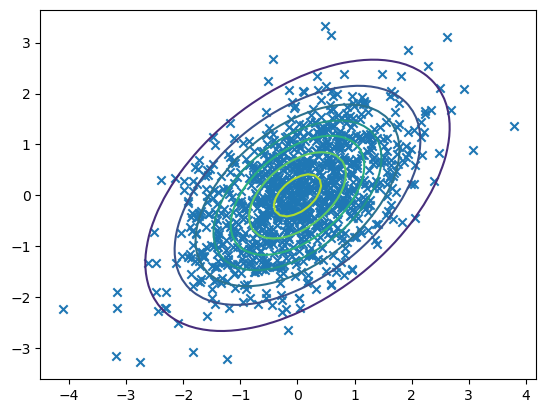

In [38]:
plt.contour(X, Y , Z)
plt.scatter(G[:,0], G[:,1], marker='x')

## Gaussian Mixtures

1. Simulate a dataset from this model. You may take n = 100, K = 2, and
two well separated values for µ1 and µ2.
2. We consider a N(0, 102
) prior for each µi (independently). Implement a
Gibbs sampler that targets the posterior distribution of (µ1, µ2) given the
observations y1:n. Hint: you must introduce latent variables zi
, where zi
is
the Gaussian component that is associated to each individual observation
yi
.
3. The likelihood of the model is permutation-invariant (e.g. when you swap
µ1 with µ2 when K = 2). Do a scatter plot of the simulated pairs (µ1, µ2)
(obtained from the Gibbs sampler of the previous question). Try different
settings and discuss.
4. Generalise to unknown variances for the Gaussian components (use an
inverse-gaussian prior), then unknown prior probabilities for the different
components (for K = 2 take a Beta distribution; then for K ≥ 3, you may
consider a Dirichlet distribution.)


In [42]:
# Question 1

K = 2

def GMM(mu1,mu2):
    z = np.random.choice([1,2])
    if z == 1:
        return np.random.normal(mu1)
    else:
        return np.random.normal(mu2)
    
def gen_dataset(n, mu1, mu2):
    y = np.zeros(n)
    for i in range(n):
        y[i] = GMM(mu1,mu2)
    return y

gen_dataset(100,1,0)

array([-0.90808419,  1.2953077 ,  1.0215191 ,  0.37387644,  2.06020026,
        0.86668884, -0.47513668, -0.57855601, -0.74257658,  1.6134451 ,
       -0.34614585,  0.19979911, -0.47660401,  1.28235225,  1.68779362,
        0.42243875, -2.00386007,  1.00189389, -0.29170265,  0.96104009,
        0.99524401,  1.82612041,  3.44196928,  0.69526445, -0.22840313,
       -0.61467723,  3.1466347 , -0.54446628,  1.28978039, -0.07961947,
       -1.09627422, -1.35727791,  1.55685234, -1.955574  , -0.64353743,
       -0.04140342, -1.17814508, -0.73946028, -0.45520305,  1.72655898,
       -1.410603  ,  0.76836064,  0.22166408, -0.70633463,  0.77474086,
        0.46667201,  2.61672456,  0.52970611,  2.91597517, -0.11233536,
        2.5556634 ,  0.16855639,  0.16652335, -0.17096253, -1.0981304 ,
        1.80188567,  0.12497114, -0.79513918,  0.56911153,  1.0487428 ,
       -1.80541732,  2.10904728,  1.32164061,  1.28038801,  0.05196159,
        0.99831274,  0.53484485,  1.590325  ,  2.0612026 ,  0.52

In [ ]:
# Question 2: on nous donne Y mais on ne connait pas mu1 ni mu2

